<a href="https://colab.research.google.com/github/AironMattos/ImersaoDadosAlura/blob/main/ImersaoDados02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


#Desafio 01: Amostra de alunos de 13 e 14 anos


In [ ]:
df.query('NU_IDADE<=14')


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
310,190001016485,2019,1501402,Belém,15,PA,14,F,1,1,1,1501402.0,Belém,15.0,PA,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AEDBBCDBADEEEBABEBDABBEABEBCBECACACDEABBABDEB,99999EADBCBABEBACCBECDDAEEAACCBEEEAADACEBBEEED...,DEBBAECBAEEACCCEECEADBEBCEAECBAAAEADDEBCABCEB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,140.0,620.0,E,E,F,D,4,C,A,C,D,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
2818,190001116721,2019,2202406,Capitão de Campos,22,PI,14,F,1,3,1,2202406.0,Capitão de Campos,22.0,PI,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CADCDBAACEDABACABADCDDBEABEBBDDAAADEADBACDAAC,99999CEEBCBCEBABAACAAAEBCBEABCBCDAAAADAABDBEBD...,DEBCBEEBBCAAABCBAACDBBCDDAAAACCBCDCCABCBBECAE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,40.0,40.0,120.0,20.0,340.0,H,G,F,B,7,B,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A
3022,190001124999,2019,2100303,Aldeias Altas,21,MA,14,M,1,3,1,5300108.0,Brasília,53.0,DF,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CACADAECEAEBBBBDADABABACACDDDDCCACCBABCBACCAE,99999BBBBBBBBBBDCADBCABDBDACACBECBCBEBABDADBAB...,ACAECABEDBCDCDBBCDEECEBCBADBBEBABABBDEBDCBCDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,3.0,0.0,0.0,0.0,0.0,0.0,0.0,D,G,B,B,3,C,A,B,C,B,B,B,A,B,A,B,A,A,B,B,A,D,A,B,B
5748,190001229936,2019,2908408,Conceição do Coité,29,BA,14,F,1,0,2,NaN,NaN,NaN,NaN,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,C,C,2,A,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
8845,190001353348,2019,2600104,Afogados da Ingazeira,26,PE,14,F,1,3,1,2600104.0,Afogados da Ingazeira,26.0,PE,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACBDDEACABCAABBADAEABBEBCEEDADADBBBEAEEEBCEEE,EBCDD99999BEBECDEDCBDAADBEEBDEEBDAEDEBBCCDCDDC...,DDCCACACCDEECBEBABBAACEAECCEEEBACDBDCAEBAADEB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,180.0,140.0,180.0,100.0,740.0,D,E,D,C,4,B,A,B,D,B,A,B,A,B,A,B,A,A,B,B,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123574,190005947160,2019,5004502,Itaporã,50,MS,14,M,1,1,1,5003702.0,Dourados,50.0,MS,4

#Desafio 02: Aumentar a amostra para alunos menor de idade e comparar a proporção por estado

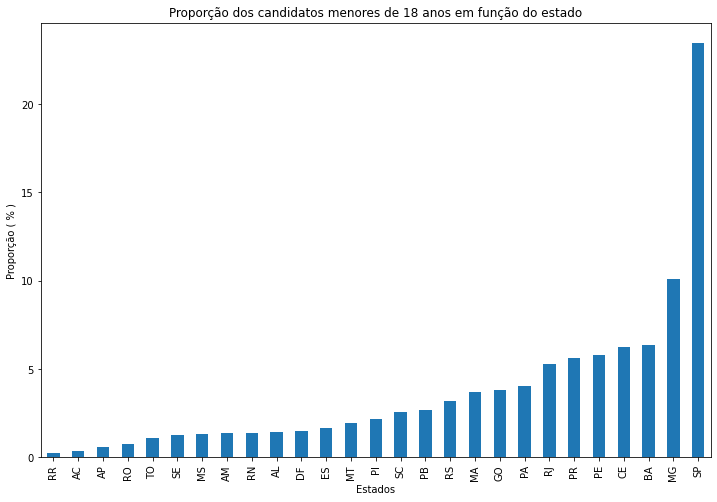

In [ ]:
prop_estado = df.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts(normalize=True).sort_values() * 100
prop_estado


plt.xlabel('Estados')
plt.ylabel('Proporção ( % )')
plt.title('Proporção dos candidatos menores de 18 anos em função do estado')
prop_estado.plot.bar(figsize=(12,8))


#Desafio 3: Criar uma função para plotar o boxplot do seaborn

In [ ]:
renda_ordenada = df["Q006"].unique()
renda_ordenada.sort()

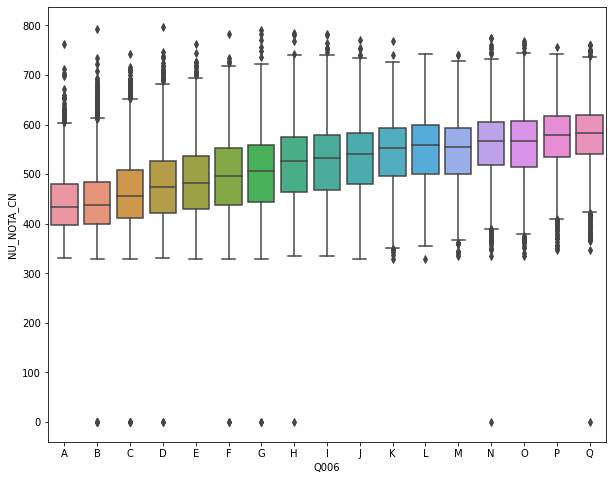

In [ ]:
import seaborn as sns

def plot_box(y):
  plt.figure(figsize=(10,8))
  sns.boxplot(x='Q006', y=y, data=df, order=renda_ordenada)

plot_box(y='NU_NOTA_CN')

#Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [ ]:
#Total de candidatos que tiraram zero

df['NU_NOTA_TOTAL'] = df[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']].sum(axis=1)

len(df.query('NU_NOTA_TOTAL==0'))

29162

In [ ]:
#Total de candidatos ausentes em alguma prova

ausente = df.query('NU_NOTA_TOTAL==0').query('TP_PRESENCA_CN==0 and TP_PRESENCA_CH==0 and TP_PRESENCA_MT==0 and TP_PRESENCA_LC==0')
len(ausente)

28998

In [ ]:
#Total de candidatos elimados em alguma prova
eliminados = df.query('NU_NOTA_TOTAL==0').query('TP_PRESENCA_CN==2 or TP_PRESENCA_CH==2 or TP_PRESENCA_MT==2 or TP_PRESENCA_LC==2')
len(eliminados)

120

#Desafio 5: Verificar se quem é eliminado tirou zero ou é NaN (não teve registro de notas)

In [ ]:
#ausente na prova de CN 
df.query('TP_PRESENCA_CN == 0')['NU_NOTA_CN'].iloc[0]

nan

In [ ]:
#eliminado na prova de CN 
df.query('TP_PRESENCA_CN == 2')['NU_NOTA_CN'].iloc[0]

nan

#Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

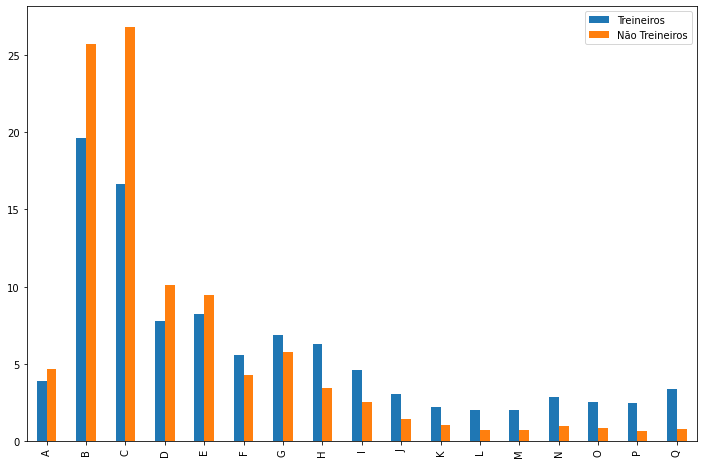

In [ ]:
  dados_treineiros = df.query('IN_TREINEIRO==1')['Q006'].value_counts (normalize=True) * 100
dados_nao_treineiros = df.query('IN_TREINEIRO==0')['Q006'].value_counts (normalize=True) * 100

bora = pd.DataFrame({'Treineiros': dados_treineiros,
                   'Não Treineiros': dados_nao_treineiros})

bora.plot.bar(figsize=(12,8))

#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

No handles with labels found to put in legend.


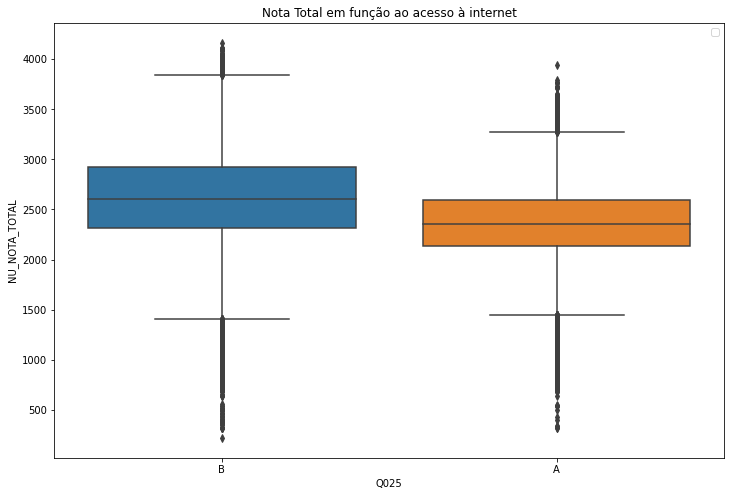

In [ ]:
#sns.boxplot(x="Q025", y="NU_NOTA_TOTAL")
dados_sem_notas_zero = df.query('NU_NOTA_TOTAL!=0')
plt.figure(figsize=(12,8))
plt.title('Nota Total em função ao acesso à internet')
plt.legend()
sns.boxplot(x="Q025", y="NU_NOTA_TOTAL", data=dados_sem_notas_zero)


# Não possui acesso à internet (A)
# Possui acesso à internet (B)

#Reflexão
  
  
  Observa-se de maneira objetiva um menor desempenho geral dos candidatos sem acesso à internet. Mediante a realidade do país, onde o acesso à internet é, ainda hoje, um obstáculo para grande parcela da população, infere-se a clara necessidade de se prover acesso à internet de forma mais democrática por todo o país.

  Um processo seletivo da abrangência do ENEM deve ter a isonomia como um dos seus nortes. Porém, a dificuldade de acesso à internet é para muitos candidatos, apenas mais uma das diversas máculas que a prova enfrenta.

  Haja visto o atual contexto da pandemia de covid-19 e o fechamento de escolas para aulas presenciais, a falta de acesso à internet se torna um problema ainda maior e que demanda intervenção de imediato, seja por políticas públicas, seja por ações público-privadas.
